In [1]:
import pandas as pd
import numpy as np

# Reads the data and drops "CUSTOMER_ID" attribute because it has nothing to do with the outcome.
data = pd.read_csv("Clothing_Store.csv")
data

,CUSTOMER_ID,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,2,368.46,184.23,0,0.18,0.00,0.00,0.30,...,7,N,0,5,0,0.00,111.00,10,0.00,0
1,9955600073501,1028,4,258.00,64.50,1,0.26,0.16,0.00,0.00,...,7,Y,0,4,2,50.00,43.50,10,0.03,1
2,9955600076313,1056,2,77.00,38.50,0,1.00,0.00,0.00,0.00,...,7,N,0,4,0,0.00,68.60,16,0.00,0
3,9955600078045,1118,8,846.06,105.75,1,0.38,0.00,0.05,0.06,...,7,Y,0,9,6,66.67,26.96,10,0.00,0
4,9955600078517,1107,1,87.44,87.44,0,0.20,0.20,0.00,0.00,...,7,Y,0,0,0,0.00,24.50,20,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,9964400917586,63105,2,39.00,19.50,0,0.00,0.00,0.39,0.00,...,870,Y,0,1,0,0.00,107.66,1,1.51,0
21736,9964401018057,72207,6,280.59,46.76,0,0.02,0.00,0.00,0.06,...,4507,N,0,5,2,40.00,18.45,12,0.69,0
21737,9964401099104,77084,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,...,1615,N,0,7,2,28.57,12.62,15,0.08,1
21738,9964401138852,78640,3,265.94,88.64,0,0.18,0.00,0.03,0.11,...,36,Y,0,7,0,0.00,32.12,38,0.37,0


# Preprocessing

The data has to be preprocessed so that the classifier may run on it properly. First, "CUSTOMER_ID" has nothing to do with the outcome and must be removed. Second, the attributes must be numeric, as sklearn classifiers do not take categorical statements. At last, when this is passed to the KNN algorithm, attributes with large range such as "ZIP_CODE" will overpower attributes with smaller range such as "TOTAL_VISITS".

In [2]:
# Drops the "CUSTOMER_ID" because it has nothing to do with the outcome.
data = data.drop(columns="CUSTOMER_ID")

# Makes "VALPHON" numeric.
data = data.replace({'N':0, 'Y':1})

# Because the KNN algorithm will be used, data must also be normalized.
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()
scaler.fit(data)
data = DataFrame(scaler.transform(data), columns=data.columns)

data

# Splits into input and target
X = data.drop(columns=['RESP'])
Y = data['RESP'].values

# Comparison of Classifiers

Here we will compare different classifiers. I use 20-fold cross-validation for every classifier.

In order to determine whether two classifiers are significantly different, I will use the T-test with 18 degrees of freedom. I set confidence to 95%.

In [3]:
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="saga")

score1 = cross_val_score(clf, X, Y, cv=20)
mean = np.mean(score1)

print("mean: ", mean)

mean:  0.8518859245630175


### KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

best_mean = 0
best_k = 0
score2 = None

for k in range(31, 51, 2):
    clf = KNeighborsClassifier(n_neighbors = k, weights="distance")
    score = cross_val_score(clf, X, Y, cv=20)
    mean = np.mean(score)
    
    if mean > best_mean:
        best_mean = mean
        best_k = k
        score2 = score

print("mean: ", best_mean)
print("n_neighbors: ", best_k)

mean:  0.8433302667893285
n_neighbors:  49


### Neural Nets

In [6]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

score3 = cross_val_score(clf, X, Y, cv=20)
mean = np.mean(score3)

print("mean: ", mean)

C:\Users\cuiji\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cuiji\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cuiji\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cuiji\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

mean:  0.8475160993560259


C:\Users\cuiji\anaconda3\envs\machinelearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

score4 = cross_val_score(clf, X, Y, cv=20)
mean = np.mean(score4)

print("mean: ", mean)

mean:  0.7876724931002759


### Comparison

I write a function to perform the t-test on two classifiers' results.

In [8]:
# Does the two-tailed t-test with 95% confidence. Returns False if classifiers are significantly different.
def cmp(sc1, sc2):
    diflist = sc1 - sc2
    difmean = np.mean(diflist)
    difstddev = np.std(diflist)
    difvar = difstddev / (20**0.5)

    # 2.101 is from the t table.
    lower_bound = (-2.101) * difvar
    upper_bound = (2.101) * difvar
    
    if difmean < lower_bound or difmean > upper_bound:
        return False
    else:
        return True

print(cmp(score1, score2))
print(cmp(score1, score3))
print(cmp(score1, score4))
print(cmp(score2, score3))
print(cmp(score2, score4))
print(cmp(score3, score4))

False
False
False
False
False
False


### Comparison Results

Logistic regression and neural net yielded similar results. They both yielded better results than KNN, which yielded better results than decision tree. 

# Lift Chart

Lift Chart. This provides a visual presentation of how good the classifier is.

In [20]:
from sklearn.model_selection import train_test_split

# Uses Logistic Regression (This is because while it is not significantly different from Neural Nets, it is faster)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = LogisticRegression(solver='saga')
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

# Sets up a pd.DataFrame containing the predicted and actual result.
predicted = clf.predict(X_test)
actual = Y_test

result = pd.DataFrame({'predicted': predicted, 'actual': actual})
print(result)

0.8502759889604415
      predicted  actual
0           0.0     0.0
1           0.0     0.0
2           0.0     0.0
3           0.0     1.0
4           0.0     0.0
...         ...     ...
4343        0.0     0.0
4344        0.0     0.0
4345        0.0     0.0
4346        0.0     0.0
4347        0.0     0.0

[4348 rows x 2 columns]


In [21]:
# In order to create the lift chart, I will first create a list such that the predicted "yes" all appear first...
result = result.sort_values(['predicted'],ascending=False)
print(result)

# ...and then count the cumulative sum of the true positive (TP) predictions.
result['cumulative'] = result['actual'].cumsum()
print(result)

# This is for the "random" classifier.
print(len(Y_test))
cumulative = 0
for i in result['actual']:
    if i == 1:
        cumulative = cumulative + 1
xAxisLength = len(Y_test)
yAxisLength = cumulative / xAxisLength

print(xAxisLength, yAxisLength)

      predicted  actual
1116        1.0     0.0
560         1.0     0.0
549         1.0     1.0
1749        1.0     0.0
3843        1.0     0.0
...         ...     ...
1495        0.0     0.0
1496        0.0     0.0
1497        0.0     0.0
1498        0.0     0.0
4347        0.0     0.0

[4348 rows x 2 columns]
      predicted  actual  cumulative
1116        1.0     0.0         0.0
560         1.0     0.0         0.0
549         1.0     1.0         1.0
1749        1.0     0.0         1.0
3843        1.0     0.0         1.0
...         ...     ...         ...
1495        0.0     0.0       732.0
1496        0.0     0.0       732.0
1497        0.0     0.0       732.0
1498        0.0     0.0       732.0
4347        0.0     0.0       732.0

[4348 rows x 3 columns]
4348
4348 0.16835326586936522


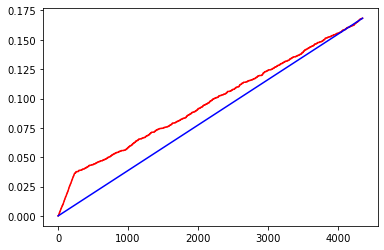

In [22]:
# Graphs the lift chart.
import matplotlib.pyplot as plt

xAxis = np.arange(1, xAxisLength + 1)
yClassifier = result['cumulative'] / xAxisLength
yRandom = xAxis * yAxisLength / xAxisLength

plt.plot(xAxis, yClassifier, label='sorted', c='r')
plt.plot(xAxis, yRandom, label='rand', c='b')

### Cost-benefit Analysis

I use 1 dollar per mail, 5 dollars gain.

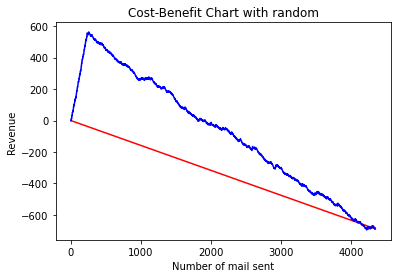

In [37]:
# The cost-benefit graph of random classifier.
cost_benefit_random = pd.DataFrame({'sent':xAxis, 'cost':xAxis * 1, 'benefit':(xAxis / xAxisLength) * cumulative * 5})

# The cost-benefit graph of logistic regression
cost_benefit_classifier = pd.DataFrame({'sent':xAxis, 'cost':xAxis * 1, 'benefit':result['cumulative'] * 5})

plt.plot(cost_benefit_random['sent'], cost_benefit_random['benefit'] - cost_benefit_random['cost'], c='r')
plt.plot(cost_benefit_classifier['sent'], cost_benefit_classifier['benefit'] - cost_benefit_classifier['cost'], c='b')

plt.title("Cost-Benefit Chart with random")
plt.xlabel('Number of mail sent')
plt.ylabel('Revenue')

plt.show()

The graph indicates that sending mail randomly is a complete waste of money, but using the classifier and sending roughly 200 mails (by the looks of it) can maximize revenue. I will now find the exact value of that revenue and the number of letters sent to have that revenue.

In [38]:
max_revenue_classifier = np.max(cost_benefit_classifier['benefit'] - cost_benefit_classifier['cost'])
print("Max Revenue: $", max_revenue_classifier)

m = 0
for i in range(len(cost_benefit_classifier['benefit'])):
    if (cost_benefit_classifier['benefit'] - cost_benefit_classifier['cost'])[i] == max_revenue_classifier:
        m = cost_benefit_classifier['sent'][i]

print("Number of mail sent: ", m)
print("Profit if", m, "mail are sent: ", (cost_benefit_random['benefit'] - cost_benefit_random['cost'])[m - 1])

Max Revenue: $ 561.0
Number of mail sent:  254
Profit if 254 mail are sent:  -40.19135234590618


### Conclusion

We gained 294 dollars of profit. Without the classifier, there's no way of earning any revenue, and the more mail sent the greater the loss. However, revenue increases with the number of mail sent until 254, past which point the revenue decreases.

### 